In [1]:
#############################################################################
################## -- Machine Learning Inmersion --##########################
####### Aprendizaje No Supervisado : Segmentación de Clientes + Reducción de Dimensiones ########
# Autor : André Chávez 

### 1 LIBRERÍAS A UTILIZAR

In [2]:
#Importar las librerías necesarias en Python.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

#### Algoritmo de Reducción de Dimensiones + Algoritmos de Segmentación K-Means (++)

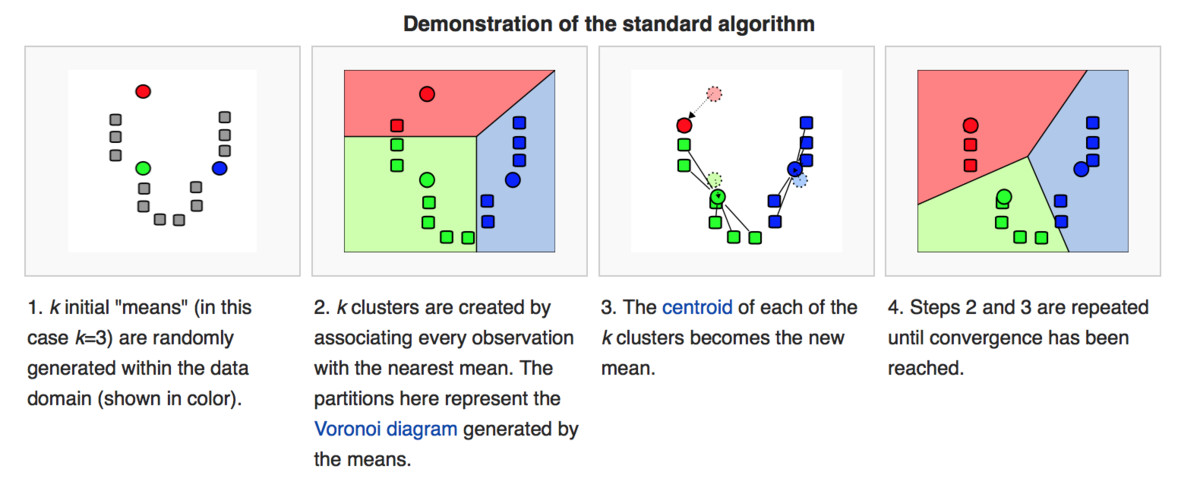

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.
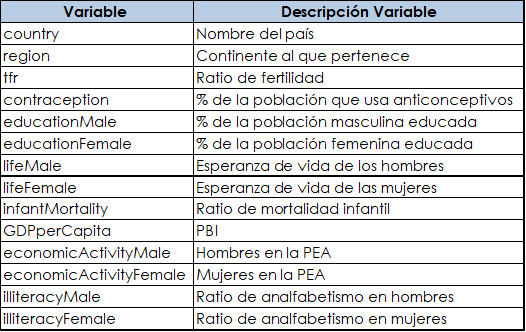

In [4]:
data = pd.read_csv('C:/Users/Andre Chavez/Desktop/DictadodeCursos/DataMiningConsulting/PEABI-IntroduccionMachineLearning/Sesion04-AprendizajeNoSupervisado/DataSet/UN.csv')

In [6]:
data.shape

(207, 14)

Observamos una gran cantidad de registros perdidos, los cuales podríamos imputar con algún algoritmo estudiado en clase.

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.columns

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')

In [9]:
data['country'][0]

'Afghanistan'

In [10]:
data[0:4]['country']

0       Afghanistan
1           Albania
2           Algeria
3    American.Samoa
Name: country, dtype: object

In [8]:
print('Estructura de los datos')
[(col, type(data[col][0])) for col in data.columns] 

Estructura de los datos


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

#### % de Valores Perdidos o Missings por Variables

In [28]:
# Dimensiones de la data
data.shape

(207, 14)

In [11]:
# Vemos el % de Valores perdidos por variables
data.count(0)

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [13]:
# Vemos el % de Valores perdidos por variables
print('% de poblamiento de las variables')
data.count(0)/data.shape[0] * 100

% de poblamiento de las variables


country                   100.000000
region                    100.000000
tfr                        95.169082
contraception              69.565217
educationMale              36.714976
educationFemale            36.714976
lifeMale                   94.685990
lifeFemale                 94.685990
infantMortality            97.101449
GDPperCapita               95.169082
economicActivityMale       79.710145
economicActivityFemale     79.710145
illiteracyMale             77.294686
illiteracyFemale           77.294686
dtype: float64

Por ésta vez vamos a considerar sólo las variables que estén con la información completa.

In [16]:
df = data[['tfr','contraception','lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita','economicActivityMale','economicActivityFemale','illiteracyMale','illiteracyFemale']]
df = df.dropna(how='any')

In [17]:
# Vemos el % de Valores perdidos por variables
print('% de poblamiento de las variables')
df.count(0)/df.shape[0] * 100

% de poblamiento de las variables


tfr                       100.0
contraception             100.0
lifeMale                  100.0
lifeFemale                100.0
infantMortality           100.0
GDPperCapita              100.0
economicActivityMale      100.0
economicActivityFemale    100.0
illiteracyMale            100.0
illiteracyFemale          100.0
dtype: float64

In [18]:
df.shape

(97, 10)

In [20]:
df.head(1)

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0


### Analizamos la relación existente entre las variables


In [21]:
matrix_correlations_paises=df.corr()
matrix_correlations_paises

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.700416,-0.732188,-0.825177,0.820365,-0.371675,0.383166,-0.164210,0.729894,0.759104
contraception,-0.700416,1.000000,0.684806,0.683828,-0.686826,0.342377,-0.187386,0.019584,-0.557717,-0.562519
lifeMale,-0.732188,0.684806,1.000000,0.965744,-0.873587,0.483363,-0.197267,-0.217249,-0.630533,-0.667473
lifeFemale,-0.825177,0.683828,0.965744,1.000000,-0.923671,0.469520,-0.278806,-0.110261,-0.720828,-0.770696
infantMortality,0.820365,-0.686826,-0.873587,-0.923671,1.000000,-0.446811,0.292581,0.072473,0.738038,0.793417
GDPperCapita,-0.371675,0.342377,0.483363,0.469520,-0.446811,1.000000,-0.129578,-0.040779,-0.280243,-0.281056
economicActivityMale,0.383166,-0.187386,-0.197267,-0.278806,0.292581,-0.129578,1.000000,0.135534,0.425205,0.379959
economicActivityFemale,-0.164210,0.019584,-0.217249,-0.110261,0.072473,-0.040779,0.135534,1.000000,-0.119927,-0.175309
illiteracyMale,0.729894,-0.557717,-0.630533,-0.720828,0.738038,-0.280243,0.425205,-0.119927,1.000000,0.961777
illiteracyFemale,0.759104,-0.562519,-0.667473,-0.770696,0.793417,-0.281056,0.379959,-0.175309,0.961777,1.000000


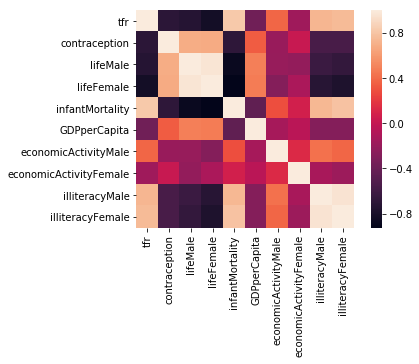

In [22]:
import seaborn as sns
sns.heatmap(matrix_correlations_paises, square = True) #Plot the correlation as heat map

### Exportamos la información a un csv para poder visualizar las relaciones.

In [ ]:
matrix_correlations_paises.to_csv('C:/Users/Andre Chavez/Desktop/Machine Learning for Data Science-URP/DataSet/Aprendizaje No Supervisado/Matrix_correlations_paises.csv')

### Aplicamos el Algoritmo de K - Means - Datos Originales

In [23]:
Kmeans=KMeans(n_clusters=3, n_init=1,init='random') # Traemos o especificamos el algoritmo
Kmeans.fit(df) # Ajustamos el algoritmo

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
Kmeans.labels_

array([1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1])

In [25]:
df.head(1)

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0


In [26]:
# Guardamos la variable del segmento o grupo en nustra base de datos
df['SegmentoPais'] = Kmeans.predict(df)
df.head()


,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,0
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1


In [27]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2'
}

df.SegmentoPais = df.SegmentoPais.map(clust_map)
df[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster0
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster1
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster2
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster1
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster1
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster1
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster1


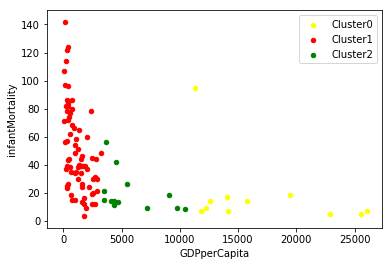

In [28]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

In [29]:
# Podemos evaluar el coeficiente de silueta para ver que tan bien nuestros segmentos se han formado.
from sklearn.metrics import  silhouette_score
clusters=Kmeans.labels_
silhouette_avg = silhouette_score(df.drop('SegmentoPais',axis=1), clusters) # X,cluster
silhouette_avg

0.650699439607012

### Aplicamos el Algoritmo de K - Means - Datos Escalados

In [45]:
#df.head(2)

In [201]:
import pandas as pd

In [30]:
# ¿ Porqué es importante escalar las variables ?
from sklearn.preprocessing import normalize
# Escalamos los valores para poder aplicar el ACP
df_esc = normalize(df.drop('SegmentoPais', axis=1),norm='l2')

In [31]:
df_esc

array([[2.47627509e-03, 3.37969304e-02, 4.38710154e-02, 4.56908501e-02,
        2.85974026e-02, 9.95059624e-01, 4.96554900e-02, 5.06953956e-03,
        1.69634593e-02, 3.31469894e-02],
       [4.49005315e-03, 5.81065701e-02, 1.77489160e-01, 1.95449372e-01,
        6.60301933e-02, 9.34987537e-01, 1.71678503e-01, 1.37342802e-01,
        7.92362320e-04, 1.32060387e-03],
       [1.55427553e-04, 4.94179911e-03, 5.61930383e-03, 6.14536632e-03,
        1.11589012e-03, 9.99917256e-01, 6.47216271e-03, 5.34033130e-03,
        1.19559656e-04, 1.59412875e-04],
       [3.27299065e-04, 5.84069039e-03, 7.83534126e-03, 8.29818842e-03,
        1.98363070e-03, 9.99860073e-01, 9.71979042e-03, 3.21788980e-03,
        1.20119859e-03, 2.27015513e-03],
       [9.35379538e-03, 1.45966871e-01, 1.73075004e-01, 1.73372895e-01,
        2.32355427e-01, 8.34096403e-01, 2.64527716e-01, 1.66521389e-01,
        1.50733136e-01, 2.20141872e-01],
       [2.41126235e-04, 7.66586296e-03, 1.02583184e-02, 1.09691530e-02,
   

In [32]:
Kmeans2=KMeans(n_clusters=3, n_init=1,init='random') # Traemos o especificamos el algoritmo
Kmeans2.fit(df_esc) # Ajustamos el algoritmo

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
# Podemos evaluar el coeficiente de silueta para ver que tan bien nuestros segmentos se han formado.
from sklearn.metrics import  silhouette_score
clusters2=Kmeans2.labels_
silhouette_avg = silhouette_score(df_esc, clusters2)
silhouette_avg

0.6426298430930163

In [ ]:
# Algo muy imortante en K - Means es que no sabemos el valor de k con antelación

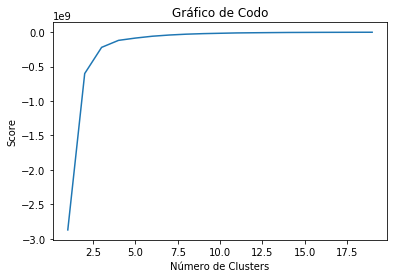

In [34]:
# Podemos aplicar rápidamente el algoritmo de K Means, viendo en dónde el codo tiene un cambio.
df3=df.iloc[:,0:10]
Nc = range(1, 20) # Rango para probar
kmeans = [KMeans(n_clusters=i) for i in Nc] # Especificamos distintos K-Means
kmeans
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfico de Codo')
plt.show()

### Reducir el número de dimensiones de los datos con ACP
### Análisis de Componentes Principales (ACP)

In [38]:
df4=df.iloc[:,0:10] # Selecciono todas las filas y solo las X
pc_toarray = df4.values 
#df4.head(2)

In [39]:
# ¿ Porqué es importante escalar las variables ?
from sklearn.preprocessing import scale
# Escalamos los valores para poder aplicar el ACP
pc_toarray = scale(pc_toarray)

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Realizando el análisis de Componentes Principales

In [41]:
# Qué algoritmo multivariable podemos usar para variables cualitativas
hpc = PCA(n_components=10).fit(pc_toarray)
hpc

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# Porcentaje de la Varianza Explicada por cada componente
hpc.explained_variance_ratio_

array([0.58858332, 0.12418127, 0.10245655, 0.07403812, 0.04929412,
       0.03151779, 0.014864  , 0.01084343, 0.00283283, 0.00138858])

In [44]:
# Porcentaje de la Varianza Explicada Acumulada
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 58.86,  71.28,  81.53,  88.93,  93.86,  97.01,  98.5 ,  99.58,
        99.86, 100.  ])

In [45]:
# Número de Componentes Principales
hpc.n_components_

10

In [46]:
hpc = PCA(n_components=4).fit_transform(pc_toarray)

Tomando como referencia el gráfico anterior , buscaremos entre 3 a 6 clusters

### Clustering de los paises en bases a sus indicadores de desarrollo

In [47]:
# Usamos el algoritmo de K-Means ++
km = KMeans(5, init='k-means++', random_state = 3425) # Instancia el algoritmo
km.fit(hpc) # Lo ejecuto sobre los Componentes Principales

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3425, tol=0.0001, verbose=0)

In [48]:
# Guardamos la variable del segmento o grupo en nustra base de datos
df4['SegmentoPais'] = km.predict(hpc)
df4.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,4
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,1
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,3


In [49]:
# Cantidad de elementos por grupo
df4.groupby('SegmentoPais').contraception.count()

SegmentoPais
0    18
1    11
2    26
3    15
4    27
Name: contraception, dtype: int64

In [50]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3',
    4:'Cluster4'
}

df4.SegmentoPais = df4.SegmentoPais.map(clust_map)
df4[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster4
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster1
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster3
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster4
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster4
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster2
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster3
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster0


In [51]:
df4.to_csv('C:/Users/Andre Chavez/Desktop/DictadodeCursos/DataMiningConsulting/PEABI-IntroduccionMachineLearning/Sesion04-AprendizajeNoSupervisado/DataSet/ClusterPaises_Clase.csv')

Analizamos el PBI vs mortalidad infantil en cada cluster.

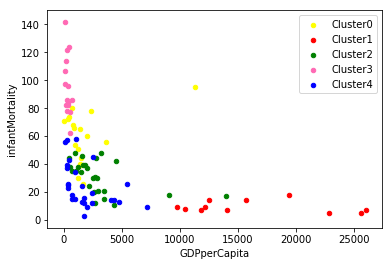

In [52]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink',
    'Cluster4':'blue'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df4[df4.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Cuando el PBI es bajo la mortalidad infantil es alta.

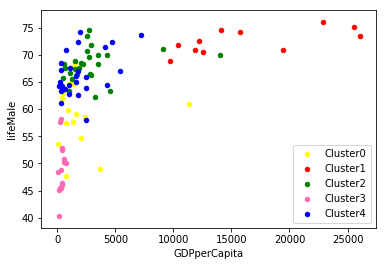

In [53]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df4[df4.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

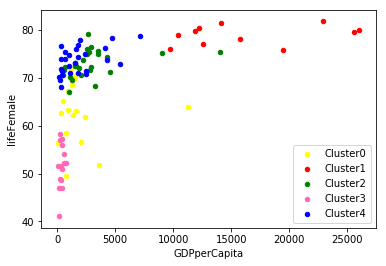

In [54]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df4[df4.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='lifeFemale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

In [55]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

labels = km.labels_
metrics.silhouette_score(hpc, labels)

0.27477236158551055

### Como encontrar el numero óptimo de clusters

In [56]:
# Determinar el valor de k (Número de Clusters)
k_range = range(1,20)
# Ajustar el algoritmo de K-Means para cada valor de k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]
# Extraer los centroides o centros de cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]
# Calcular la distancia euclídea de cada punto a cada uno de los centros de cluster.
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]
avgWithinSumSquare = [sum(d)/hpc.shape[0] for d in dist]


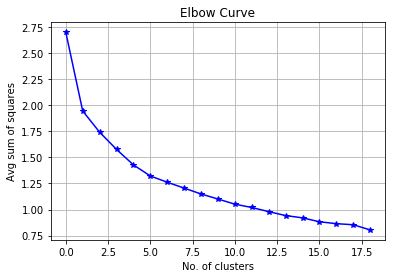

In [57]:
# Ploteamos el gráfico del codo de yambú
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avgWithinSumSquare, 'b*-')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

### Clustering Aglomerativos

In [59]:
# Importamos las librerías para clustering jerárquicos
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

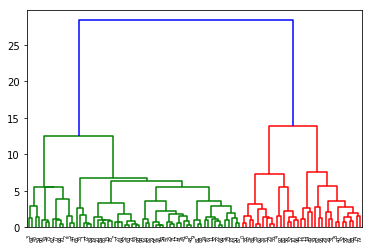

In [60]:
# Visualizamos un dendograma
dendrogram = sch.dendrogram(sch.linkage(hpc, method='ward'))

In [61]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
model.fit(hpc)
labels = model.labels_
#Generamos las medidas idóneas de agrupación de clusters
print("Coeficiente Silhouette: %0.3f"
      % metrics.silhouette_score(hpc, labels, metric='sqeuclidean'))

Coeficiente Silhouette: 0.597


In [62]:
# Guardamos la variable del segmento o grupo en nustra base de datos, hacemos una copia de la información
df6=df.iloc[:,0:10]
df6.head(10)

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000


In [63]:
df6['SegmentoPais'] = model.fit_predict(hpc)
df6.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,1
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,1
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,0


In [64]:
# Cantidad de elementos por grupo
df6.groupby('SegmentoPais').contraception.count()

SegmentoPais
0    35
1    62
Name: contraception, dtype: int64

In [65]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1'
}

df6.SegmentoPais = df6.SegmentoPais.map(clust_map)
df6[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster1
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster1
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster0
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster1
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster1
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster1
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster0
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster1


Analizamos el PBI vs mortalidad infantil en cada cluster.

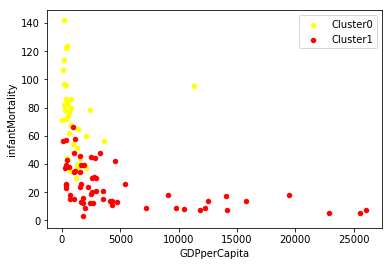

In [66]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df6[df6.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

In [68]:
# FIN!!!!